In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.linalg import expm, logm
import pandas
import lsqfit
from scipy.optimize import curve_fit
import gvar as gv

load the files

In [78]:
data = pandas.read_csv('NormanData/FinalData/simulation_production_run_on_ibm_nairobi_data=2022-09-10_3qubits_cbqi25b4fms1nkdes8fg.csv')
data2 = pandas.read_csv('NormanData/FinalData/[DD]simulation_production_run_on_ibm_nairobi_data=2022-09-10_3qubits_63067c74e9f73b717085437c.csv')

In [79]:
ddict = data2.to_dict()
ddict0 = data.to_dict()

In [80]:
data2['counts bare'][99]

"{'0x0': 343, '0x1': 101, '0x2': 88, '0x3': 488, '0x4': 79, '0x5': 366, '0x6': 459, '0x7': 76}"

generate the readout correction matrxi

In [81]:
mats = np.zeros((3, 2, 2))
counts1 = eval(data2['counts bare'][1200])
counts2 = eval(data2['counts bare'][1201])
for key in counts1.keys():
    key2 = (np.binary_repr(int(key, 16), width=6))[:3]
    print(key2)
    for j in range(3):
        if key2[j] == '0':
            mats[j, 0, 0] += counts1[key] / sum(counts1.values())
        else:
            mats[j, 0, 1] += counts1[key] / sum(counts1.values())
            
for key in counts2.keys():
    key2 = (np.binary_repr(int(key, 16), width=6))[:3]
    print(key2)
    for j in range(3):
        if key2[j] == '0':
            mats[j, 1, 0] += counts2[key] / sum(counts2.values())
        else:
            mats[j, 1, 1] += counts2[key] / sum(counts2.values())
        
print(mats)
reflect_mat = np.identity(1)
for j in range(3):
    reflect_mat = np.kron(reflect_mat, np.linalg.inv(mats[j]))
np.save('refmat.npy', reflect_mat)

000
010
100
001
010
011
100
101
110
111
001
[[[0.98   0.02  ]
  [0.067  0.933 ]]

 [[0.9915 0.0085]
  [0.044  0.956 ]]

 [[0.991  0.009 ]
  [0.0425 0.9575]]]


generate the data for no mitigation

In [82]:

op2 = np.array([1 if np.binary_repr(k, width=3)[::2].count('1') % 2 == 1 else 0 for k in range(8)])
op = np.array([1 if np.binary_repr(k, width=3).count('1') % 2 == 0 else -1 for k in range(8)])
op = op * op2

rescale_data = [[] for j in range(20)]
evolution_data = [[] for j in range(20)]

for i in range(1200):
    counts = eval(ddict0['counts bare'][i])
    if (i // 30) % 2 == 0:
        value = 0
        for key in counts.keys():
            ind = int(key, 16)
            key2 = np.binary_repr(ind, width=3)
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        evolution_data[i // 60].append(value / sum(counts.values()))
    else:
        value = 0
        for key in counts.keys():
            ind = int(key, 16)
            key2 = np.binary_repr(ind, width=3)
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        rescale_data[i // 60].append(value / sum(counts.values()))

generate data for readout and post selection

In [83]:

op2 = np.array([1 if np.binary_repr(k, width=3)[::2].count('1') % 2 == 1 else 0 for k in range(8)])
op = np.array([1 if np.binary_repr(k, width=3).count('1') % 2 == 0 else -1 for k in range(8)])
op = op * op2

rescale_rops_data = [[] for j in range(20)]
evolution_rops_data = [[] for j in range(20)]

for i in range(1200):
    counts = eval(ddict0['counts mitigated'][i])
    if (i // 30) % 2 == 0:
        value = 0
        for key in counts.keys():
            ind = int(key, 16)
            key2 = np.binary_repr(ind, width=3)
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        evolution_data[i // 60].append(value / sum(counts.values()))
    else:
        value = 0
        for key in counts.keys():
            ind = int(key, 16)
            key2 = np.binary_repr(ind, width=3)
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        rescale_data[i // 60].append(value / sum(counts.values()))

In [84]:
reflect_mat

array([[ 1.04085681e+00, -9.78351047e-03, -9.25447999e-03,
         8.69872793e-05, -2.23120430e-02,  2.09721553e-04,
         1.98381136e-04, -1.86467908e-06],
       [-4.61999105e-02,  1.07727321e+00,  4.10773263e-04,
        -9.57826597e-03,  9.90351780e-04, -2.30926733e-02,
        -8.80542901e-06,  2.05321886e-04],
       [-4.79055435e-02,  4.50287093e-04,  1.07950787e+00,
        -1.01468103e-02,  1.02691412e-03, -9.65245644e-06,
        -2.31405760e-02,  2.17509331e-04],
       [ 2.12635572e-03, -4.95816121e-02, -4.79154930e-02,
         1.11727655e+00, -4.55810443e-05,  1.06284270e-03,
         1.02712740e-03, -2.39501941e-02],
       [-7.47453442e-02,  7.02567204e-04,  6.64576805e-04,
        -6.24667493e-06,  1.09329011e+00, -1.02763561e-02,
        -9.72067566e-03,  9.13692751e-05],
       [ 3.31767846e-03, -7.73604555e-02, -2.94981872e-05,
         6.87828317e-04, -4.85272372e-02,  1.13154099e+00,
         4.31466021e-04, -1.00607724e-02],
       [ 3.44016229e-03, -3.233572

In [85]:
rescalend_data = [[] for j in range(20)]
evolutionnd_data = [[] for j in range(20)]
rescalendro_data = [[] for j in range(20)]
evolutionndro_data = [[] for j in range(20)]
rescale_data = [[] for j in range(20)]
evolution_data = [[] for j in range(20)]
rescale_ro_data = [[] for j in range(20)]
evolution_ro_data = [[] for j in range(20)]
for i in range(1200):
    index1 = int(ddict['nt'][i]) - 1
#     print(index1)
#     print(ddict['sim type'][i])
#     if ddict['sim type'][i] == 'evolution':
    counts = ddict['counts bare'][i]
#     op2 = np.array([1 if np.binary_repr(k, width=3)[].count('1') % 2 == 1 else -1 for k in range(8)])
#     op2 = np.array([0, 1, 0, 1, 1, 0, 1, 0])
    op = np.array([1 if np.binary_repr(k, width=3).count('1') % 2 == 0 else -1 for k in range(8)])
#     op = op2
    counts = eval(counts)
    if (i // 30) % 2 == 0:
        value = 0
        vector = np.zeros(8)
        norm = 0
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
#             if key2[::2].count('1') % 2 == 1:
            norm += counts[key]
            vector[int(key, 16)] += counts[key]
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        if norm == 0:
            evolution_data[index1].append(0)
        else:
            evolution_data[index1].append(value / norm)

#         for key in counts.keys():
#             key2 = np.binary_repr(int(key, 16), width=3)
#             vector[int(key, 16)] += counts[key]
#             if key2.count('1') % 2 == 0:
#                 value += counts[key]
#             else:
#                 value -= counts[key]
#             evolution_data[index1].append(value / sum(counts.values()))
#         vector /= sum(vector)#sum(counts.values())
        vector = reflect_mat @ vector
#         vector /= sum(vector)
#         norm = sum(np.abs(op2 * vector))
        vector /= norm
        evolution_ro_data[index1].append(vector @ op)
    else:
        value = 0
        vector = np.zeros(8)
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
            vector[int(key, 16)] += counts[key] / sum(counts.values())
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
            rescale_data[index1].append(value / sum(counts.values()))
        vector = reflect_mat @ vector
#         vector /= sum(vector)
#         norm = sum(vector * op2)
#         vector /= norm
#         print(sum(vector))
#         print()
#         print(norm)
#         norm = sum(np.abs(op * vector))
        rescale_ro_data[index1].append(vector @ op)
#     break

    index1 = int(ddict0['nt'][i]) - 1
    counts = ddict0['counts mitigated'][i]
    op = np.array([1 if np.binary_repr(k, width=3).count('1') % 2 == 0 else -1 for k in range(8)])
    counts = eval(counts)
    if (i // 30) % 2 == 0:
        value = 0
        vector = np.zeros(8)

        norm = 0
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
#             print(key2[::2].count('1'))
#             if key2[::2].count('1') % 2 == 1:
            norm += counts[key]
            vector[int(key, 16)] += counts[key]
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        if norm == 0:
            evolutionnd_data[index1].append(0)
        else:
            evolutionnd_data[index1].append(value / norm)
    else:
        value = 0
        vector = np.zeros(8)
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
            vector[int(key, 16)] += counts[key]
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
            rescalend_data[index1].append(value / sum(counts.values()))
            
            
    index1 = int(ddict0['nt'][i]) - 1
    counts = ddict0['counts bare'][i]
    op = np.array([1 if np.binary_repr(k, width=3).count('1') % 2 == 0 else -1 for k in range(8)])
    counts = eval(counts)
    if (i // 30) % 2 == 0:
        value = 0
        vector = np.zeros(8)

        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
            vector[int(key, 16)] += counts[key]
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
            evolutionndro_data[index1].append(value / sum(counts.values()))
    else:
        value = 0
        vector = np.zeros(8)
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
            vector[int(key, 16)] += counts[key]
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
            rescalendro_data[index1].append(value / sum(counts.values()))
#     break
evolution_data = np.array(evolution_data).transpose()
rescale_data = np.array(rescale_data).transpose()
evolutionnd_data = np.array(evolutionnd_data).transpose()
rescalend_data = np.array(rescalend_data).transpose()
evolutionndro_data = np.array(evolutionndro_data).transpose()
rescalendro_data = np.array(rescalendro_data).transpose()
evolution_ro_data = np.array(evolution_ro_data).transpose()
rescale_ro_data = np.array(rescale_ro_data).transpose()

In [86]:
rescale_ro_data

array([[0.85921487, 0.7422154 , 0.69955934, 0.59840355, 0.55087251,
        0.54112256, 0.5094352 , 0.43874802, 0.34002972, 0.39731071,
        0.24131141, 0.14015562, 0.14259311, 0.06093722, 0.07190593,
        0.11578073, 0.12796817, 0.07434341, 0.09628082, 0.07190593],
       [0.85677738, 0.78974644, 0.70321558, 0.61302848, 0.53868507,
        0.62643467, 0.52649762, 0.48018533, 0.39243573, 0.2876237 ,
        0.23643643, 0.17306172, 0.11212449, 0.12918692, 0.06703095,
        0.06337471, 0.08896835, 0.14015562, 0.09749956, 0.08043714],
       [0.85433989, 0.7641528 , 0.67396571, 0.61424723, 0.53624758,
        0.56062247, 0.57280991, 0.42777932, 0.37171707, 0.3424672 ,
        0.18281167, 0.13162441, 0.16209302, 0.04509355, 0.10603077,
        0.0987183 , 0.12431194, 0.15478055, 0.11821822, 0.03778108],
       [0.84702743, 0.79462141, 0.7093093 , 0.60693476, 0.49237278,
        0.55574749, 0.51918516, 0.44118551, 0.37537331, 0.34124846,
        0.1779367 , 0.13040566, 0.15356181, 0

In [87]:
colorsrgb = [(0, 0, 0), (230, 159, 0), (86, 180, 233),
          (0, 158, 115), (240, 228, 66), (0, 114, 178),
          (213, 94, 0), (204, 121, 167)]
colors = [tuple([el / 255 for el in c]) for c in colorsrgb]

import matplotlib as mpl
from  matplotlib import rc
import matplotlib.pyplot as plt

mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "Times New Roman"
mpl.rcParams.keys()
# mpl.rcParams["text.fontset"] = "Times New Roman"
mpl.rcParams["mathtext.fontset"] = "stix"
# rc('text', usetex=True)

In [88]:
rdata = gv.gvar(np.mean(rescale_data, axis=0), np.std(rescale_data, axis=0) / np.sqrt(30))
edata = gv.gvar(np.mean(evolution_data, axis=0), np.std(evolution_data, axis=0) / np.sqrt(30))
rdatand = gv.gvar(np.mean(rescalend_data, axis=0), np.std(rescalend_data, axis=0) / np.sqrt(30))
edatand = gv.gvar(np.mean(evolutionnd_data, axis=0), np.std(evolutionnd_data, axis=0) / np.sqrt(30))
edataro = gv.gvar(evolutionnd_data[1], np.sqrt((1 - evolutionnd_data[1] ** 2) / 2000))
rdatandro = gv.gvar(np.mean(rescalendro_data, axis=0), np.std(rescalendro_data, axis=0) / np.sqrt(30))
edatandro = gv.gvar(np.mean(evolutionndro_data, axis=0), np.std(evolutionndro_data, axis=0) / np.sqrt(30))
edatanothing = gv.gvar(evolutionndro_data[0], np.sqrt((1 - evolutionndro_data[0] ** 2) / 2000))
r_ro_data = gv.gvar(np.mean(rescale_ro_data, axis=0), np.std(rescale_ro_data, axis=0) / np.sqrt(30))
e_ro_data = gv.gvar(np.mean(evolution_ro_data, axis=0), np.std(evolution_ro_data, axis=0) / np.sqrt(30))

In [89]:
rdata, r_ro_data, 0.3 / np.sqrt(30)

(array([0.388(41), 0.338(39), 0.294(36), 0.261(33), 0.227(31), 0.243(34),
        0.215(31), 0.190(29), 0.161(27), 0.142(26), 0.078(20), 0.062(19),
        0.054(18), 0.048(17), 0.039(17), 0.066(17), 0.063(17), 0.060(17),
        0.057(16), 0.049(16)], dtype=object),
 array([0.8597(29), 0.7737(41), 0.6791(45), 0.6069(47), 0.5402(43),
        0.5933(53), 0.5263(45), 0.4612(70), 0.3967(50), 0.3497(57),
        0.1832(59), 0.1539(42), 0.1376(47), 0.1002(44), 0.0800(45),
        0.1247(51), 0.1072(64), 0.1107(51), 0.1005(39), 0.0862(51)],
       dtype=object),
 0.054772255750516606)

In [90]:
edata_r = edata / rdata
edatand_r = edatandro / rdata
e_ro_data_r = e_ro_data / r_ro_data

In [91]:
x = np.array([[0, 1], [1, 0]], dtype='complex128')
y = np.array([[0, 1j], [-1j, 0]], dtype='complex128')
z = np.diag(np.array([1, -1], dtype='complex128'))
hfh = np.kron(x, np.kron(z, x))
hfh += np.kron(y, np.kron(z, y))
hfh /= 4
hmt = [(-1) ** (i // 2) * np.kron(np.identity(2 ** i), np.kron(z, np.identity(2 ** (2 - i)))) / 2  for i in [0, 2]]
hgt = np.kron(np.identity(2), np.kron(x, np.identity(2))) / 2
from scipy.linalg import expm

t1 = expm(-1.0j * 6 / 20 * hgt)
t2 = [expm(-1.0j * 6 / 20 * el) for el in hmt]
t3 = expm(-1.0j * 6 / 10 * hfh)

istate1 = np.kron(np.array([1, 0]), np.kron(np.array([1, -1]), np.array([0, 1]))) / np.sqrt(2)
istate2 = np.kron(np.array([0, 1]), np.kron(np.array([1, 1]), np.array([1, 0]))) / np.sqrt(2)
vec = (istate1 + istate2) / np.sqrt(2)
# print(istate)
op = np.kron(x, np.kron(z, x))
# print(op)
obs = []
for j in range(20):
    vec = t2[0] @ t2[1] @ t1 @ t3 @ t2[0] @ t2[1] @ t1 @ vec
#     print(vec)
    obs.append(vec.conjugate().transpose() @ op @ vec )
print(obs)

[(0.8405894386191685+0j), (0.4688679039971496+0j), (0.13320109969599475+0j), (0.05786476507380725+0j), (0.2931948640430679+0j), (0.6819556161713629+0j), (0.9643965665440016+0j), (0.951804824406982+0j), (0.6525935609211109+0j), (0.26668074975160516+0j), (0.05191399436643496+0j), (0.15178967938376875+0j), (0.49957587655173574+0j), (0.862899275465747+0j), (0.9990053860379711+0j), (0.8169549250607826+0j), (0.4383848885461874+0j), (0.11623680586257776+0j), (0.06575388396657689+0j), (0.32066628171841305+0j)]


In [92]:
h1 = np.array([[0, 1], [1, 0]]) * 0.25
h2 = np.array([[1 + 2, 0], [0, -1 - 2]]) 
evo1 = expm(-6j / 20 * h1)
evo2 = expm(-6j / 40 * h2)
istate = np.array([1, 1]) / np.sqrt(2)
op = np.array([[0, 1], [1, 0]])
observe = np.zeros(21)
for i in range(21):
    observe[i] += istate.conjugate().transpose() @ op @ istate
    istate = evo2 @ istate
    istate = evo1 @ istate
    istate = evo2 @ istate
print(observe)

evo2 @ evo1 @ evo2


[ 1.         -0.22031202 -0.87551965  0.64820714  0.59780452 -0.90258174
 -0.15737743  0.99791822 -0.28228257 -0.84474043  0.6959244   0.5449283
 -0.92581297 -0.09374325  0.99168161 -0.34302869 -0.8103734   0.74075577
  0.48980067 -0.94511574 -0.02967685]


C:\Users\gusta\AppData\Local\Temp\ipykernel_6764\3638177916.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  observe[i] += istate.conjugate().transpose() @ op @ istate


array([[ 6.19862510e-01-0.78112484j, -3.46944695e-18-0.07492971j],
       [ 3.46944695e-18-0.07492971j,  6.19862510e-01+0.78112484j]])

In [93]:
obs = np.array([1.0,
 0.611,
 -0.252,
 -0.8830000000000001,
 -0.8220000000000002,
 -0.10900000000000003,
 0.689,
 0.9960000000000001,
 0.537,
 -0.29799999999999993,
 -0.8810000000000001,
 -0.7659999999999999,
 0.010000000000000009,
 0.7550000000000001,
 0.976,
 0.46199999999999997,
 -0.396,
 -0.9229999999999999,
 -0.7050000000000001,
 0.03600000000000003,
 0.8380000000000001])

In [94]:
curve_fit(lambda x, p0, p1: np.cos(p1 * x), np.linspace(0, 20, 21), obs,
          p0=[1, 1])
# plt.plot()

C:\Users\gusta\miniforge3\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(array([1.        , 0.91211607]),
 array([[inf, inf],
        [inf, inf]]))

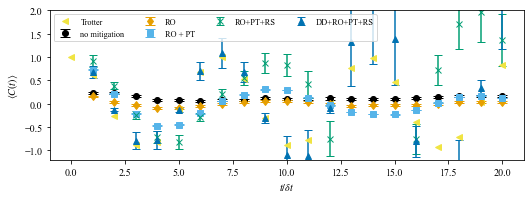

In [99]:
plt.figure(figsize=(8.5, 11 / 4))
plt.errorbar(np.linspace(1, 20, 20), gv.mean(edatanothing), yerr=gv.sdev(edatanothing), fmt='o', color=colors[0], capsize=5,
             label='no mitigation')
plt.errorbar(np.linspace(1, 20, 20), gv.mean(edataro) / 5, yerr=gv.sdev(edataro), fmt='d', color=colors[1], capsize=5,
             label='RO')
plt.errorbar(np.linspace(1, 20, 20), gv.mean(edatand), yerr=gv.sdev(edatand), fmt='s', color=colors[2], capsize=5,
             label='RO + PT')
plt.errorbar(np.linspace(1, 20, 20), gv.mean(edatand_r), yerr=gv.sdev(edatand_r), fmt='x', 
             color=colors[3], capsize=4, label='RO+PT+RS')
plt.errorbar(np.linspace(1, 20, 20), gv.mean(e_ro_data_r), yerr=gv.sdev(edata_r), fmt='^', 
             color=colors[5], capsize=4, label='DD+RO+PT+RS')
# plt.plot(np.linspace(0, 20, 21), obs)
plt.plot(np.linspace(0, 20, 21), obs, '<', label='Trotter', color=colors[4])
# plt.plot(np.linspace(0, 20, 100), np.cos(0.91211607 * np.linspace(0, 20, 100)), label='expected', color=colors[7])
# plt.errorbar(np.linspace(1, 20, 20), gv.mean(edata_r) / 2, yerr=gv.sdev(edata_r), fmt='d',
#              fillstyle='none', capsize=4, label='DD+PT+RS')
plt.ylim(-1.2, 2.0)
plt.legend(ncol=4, fontsize='small')
plt.ylabel(r'$\langle C(t) \rangle$')
plt.xlabel(r'$t / \delta t$')
plt.savefig('3qubitparam1.pdf')
# plt.errorbar(np.linspace(1, 20, 20), np.mean(rescale_data, axis=0),
#              yerr=np.std(rescale_data, axis=0) / np.sqrt(30), fmt='.', capsize=4)
# plt.plot(evolution_data[1])
# plt.plot(rescale_data[1])

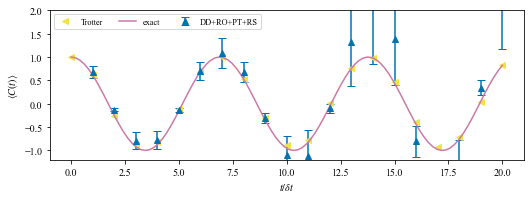

In [100]:
plt.figure(figsize=(8.5, 11 / 4))
# plt.errorbar(np.linspace(1, 20, 20), gv.mean(edatanothing), yerr=gv.sdev(edatanothing), fmt='o', color=colors[0], capsize=5,
#              label='no mitigation')
# plt.errorbar(np.linspace(1, 20, 20), gv.mean(edataro) / 5, yerr=gv.sdev(edataro), fmt='d', color=colors[1], capsize=5,
#              label='RO')
# plt.errorbar(np.linspace(1, 20, 20), gv.mean(edatand), yerr=gv.sdev(edatand), fmt='s', color=colors[2], capsize=5,
#              label='RO + PT')
# plt.errorbar(np.linspace(1, 20, 20), gv.mean(edatand_r), yerr=gv.sdev(edatand_r), fmt='x', 
#              color=colors[3], capsize=4, label='RO+PT+RS')
plt.errorbar(np.linspace(1, 20, 20), gv.mean(e_ro_data_r), yerr=gv.sdev(edata_r), fmt='^', 
             color=colors[5], capsize=4, label='DD+RO+PT+RS')
# plt.plot(np.linspace(0, 20, 21), obs)
plt.plot(np.linspace(0, 20, 21), obs, '<', label='Trotter', color=colors[4])
plt.plot(np.linspace(0, 20, 100), np.cos(0.91211607 * np.linspace(0, 20, 100)), label='exact', color=colors[7])
# plt.errorbar(np.linspace(1, 20, 20), gv.mean(edata_r) / 2, yerr=gv.sdev(edata_r), fmt='d',
#              fillstyle='none', capsize=4, label='DD+PT+RS')
plt.ylim(-1.2, 2.0)
plt.legend(ncol=4, fontsize='small')
plt.ylabel(r'$\langle C(t) \rangle$')
plt.xlabel(r'$t / \delta t$')
plt.savefig('3qubitparam1_clean.pdf')
# plt.errorbar(np.linspace(1, 20, 20), np.mean(rescale_data, axis=0),
#              yerr=np.std(rescale_data, axis=0) / np.sqrt(30), fmt='.', capsize=4)
# plt.plot(evolution_data[1])
# plt.plot(rescale_data[1])

In [96]:
gv.dump(e_ro_data_r, '3qubitparams1.gv')

'3qubitparams1.gv'

In [97]:
xdata = np.linspace(1, 20, 20)
ydata = gv.gvar(gv.mean(e_ro_data_r), gv.sdev(edata_r))# * gv.gvar(np.ones(20), np.ones(20) * 0.02)
trim = 18
def fcn(x, p):
    return p[0] * gv.cos(p[1] * x) + p[2] * gv.cos(p[3] * x) + p[4] * gv.cos(p[5] * x)
fit = lsqfit.nonlinear_fit(data=(xdata[:trim], ydata[:trim]), fcn=fcn, p0=[1, 0.9, 0, 7, 0, 15])
print(fit)

Least Square Fit (no prior):
  chi2/dof [dof] = 0.76 [12]    Q = 0.7    

Parameters:
              0    5e+02 +- 5.8e+08        [   1 +- inf ]  
              1          0.9 (80.2)        [ 0.9 +- inf ]  
              2   -5e+02 +- 5.8e+08        [   0 +- inf ]  
              3              7 (80)        [   7 +- inf ]  
              4          0.101 (54)        [   0 +- inf ]  
              5         15.480 (84)        [  15 +- inf ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10)    (itns/time = 1000*/0.3)
  fitter = scipy_least_squares    method = trf



In [98]:
evolution = np.zeros(20)
rescale = np.zeros(20)
for i in range(20):
    for key in scale_counts[i].keys():
        key2 = np.binary_repr(int(key, 16), width=3)
        if key2.count('1') % 2 == 1:
            rescale[i] += scale_counts[i][key]
        else:
            rescale[i] -= scale_counts[i][key]
    for key in evolution_counts[i].keys():
        key2 = np.binary_repr(int(key, 16), width=3)
        if key2.count('1') % 2 == 1:
            evolution[i] += evolution_counts[i][key]
        else:
            evolution[i] -= evolution_counts[i][key]
rescale /= sum(scale_counts[0].values())
evolution /= sum(evolution_counts[0].values())

NameError: name 'scale_counts' is not defined

In [ ]:
# plt.errorbar(np.linspace(1, 20, 20), gv.mean(rdata), yerr=gv.sdev(rdata), fmt='o', capsize=4, color=colors[0], label='dynamic decoupling')
plt.errorbar(np.linspace(1, 20, 20), gv.mean(rdatand), yerr=gv.sdev(rdatandro), fmt='d', capsize=4, color=colors[1], label='pauli-twirling')
plt.errorbar(np.linspace(1, 20, 20), gv.mean(rdata), yerr=gv.sdev(rdata), fmt='x', capsize=4, color=colors[2], label='dynamic decoupling')
plt.legend()
plt.savefig('rescaling.pdf')